In [21]:
from sklearn import datasets, manifold, mixture, metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from collections import OrderedDict

In [2]:
n_class = 5 # n primeiros digitos
n_neighbors = 20
n_components = 2
label_colors = [list( mcolors.TABLEAU_COLORS )[i] 
                  for i in range( 10 )]

# Carregando os dados

In [3]:
datasetOriginal = pd.read_csv("data\\mnist_test.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [5]:
df.duplicated().sum()

0

In [6]:
s = df.isnull().sum()
for i in range(len(s)):
    if s[i] != 0:
        print(s[i], i)

In [7]:
# separar os rotulos dos dados
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
label, x

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [8]:
# sort de acordo com os labels
idx = np.argsort(label)
label = label[idx]
x = x[idx]
label, x

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [9]:
unique, counts = np.unique(label, return_counts=True)
num_data = dict(zip(unique, counts))
num_data

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [36]:
# selecionando apenas parte dos dados
# de 0 a 5
idx = sum([num_data[i] for i in range(n_class)]) # soma a qtd de elementos de cada label
label_cut = label[:idx]
x_cut = x[:idx, :]

In [37]:
colors = [label_colors[v] for v in label_cut]

In [38]:
import random
c = list(zip(x_cut, label_cut))
random.shuffle(c)
x_cut, label_cut = zip(*c)

# Analise

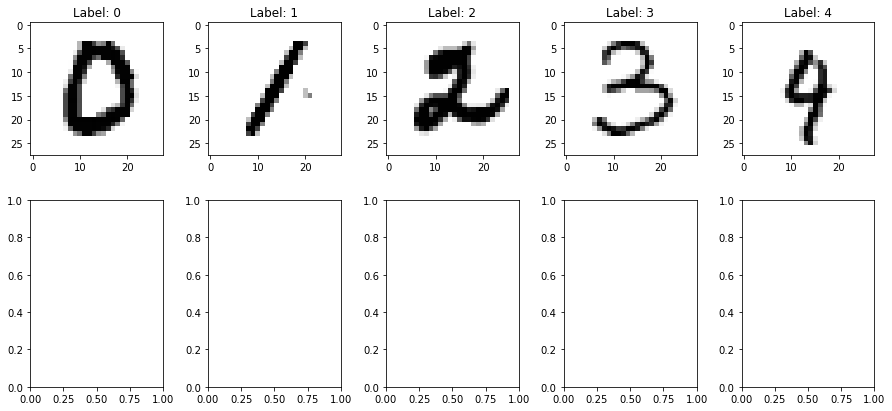

In [32]:
# plot iage of the digits
# https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
num_row = 2
num_col = 5
idx = 0
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5 * num_col, 3*num_row))
for i in range(n_class):
    ax = axes[i // num_col, i % num_col]
    idx += num_data[i] - 1
    ax.imshow(x[idx].reshape((28,28)), cmap='gray_r')
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.show()

In [22]:
methods = OrderedDict()
methods['ISOMAP'] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods['LLE'] = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
methods['SE'] = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components)
methods['LTSA'] = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='ltsa')

In [23]:
x_transformed = OrderedDict()

In [24]:
x_transformed['ISOMAP'] = methods['ISOMAP'].fit_transform(x_cut)

In [25]:
x_transformed['LLE'] = methods['LLE'].fit_transform(x_cut)

In [26]:
x_transformed['SE'] = methods['SE'].fit_transform(x_cut)

In [33]:
x_transformed['LTSA'] = methods['LTSA'].fit_transform(x_cut)

(5139, 2)
(5139, 2)
(5139, 2)
(5139, 2)


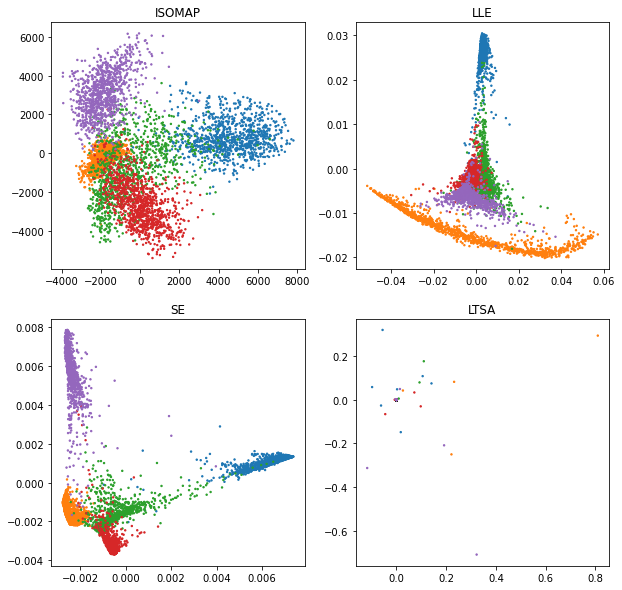

In [39]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2)
for i, (methodName, method) in enumerate(x_transformed.items()):
    Y = x_transformed[methodName]
    print(Y.shape)
    
    ax = fig.add_subplot(gs[int(i > 1), i % 2])
    ax.set_title(methodName)
    
    ax.scatter(Y[:, 0], Y[:, 1], c=colors, s=2)
plt.show()